# Problem Set 5: Trees, Forests, and Networks


## Part 1: Exploring The Titanic

Your mission for this problem set is to use your knowledge of supervised machine learning to try to predict which passengers aboard the Titanic were most likely to survive. The prompts for this part of the problem set are deliberately vague - the goal is to leave it up to you how to structure (most of) your analysis. We **highly recommend** you closely go over the entire problem set once before starting; this is important, so that you understand the sequence of steps and not perform redundant work.

To get started, read about the prediction problem on [Kaggle](https://www.kaggle.com/c/titanic). Then, download the data [here](https://www.kaggle.com/c/titanic/data) - you'll need the `train.csv` data. Treat this as your entire dataset, and further build train and test splits from this dataset whenever required. 

### 1.1 Exploratory data analysis

Create 2-3 figures and tables that help give you a feel for the data. Make sure to at least check the data type of each variable, to understand which variables have missing observations, and to understand the distribution of each variable (and determine whether the variables should be standardized or not). Are any of the potential predictor variables (i.e., anything execpt for survival) collinear or highly correlated? Remember that this is the EDA phase, and we want to save pre-processing steps like imputations, transformations etc. and feature engineering for later.

In [1]:
# Your code here
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
from scipy import stats
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


Using TensorFlow backend.


In [2]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
data.Ticket.unique().size

681

In [9]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
pd.crosstab(data.Survived,data.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [11]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
pd.crosstab(data.Survived,data.Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [13]:
data.Cabin.unique().size

148

In [14]:
pd.crosstab(data.Survived,data.Parch)

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [15]:
pd.crosstab(data.Survived,data.SibSp)

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


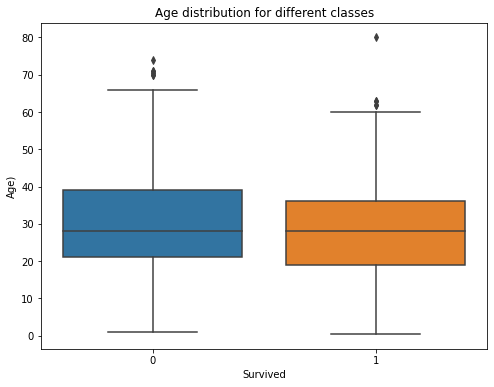

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Survived", y="Age", data=data)
plt.title("Age distribution for different classes")
plt.ylabel("Age)")
plt.xlabel("Survived");

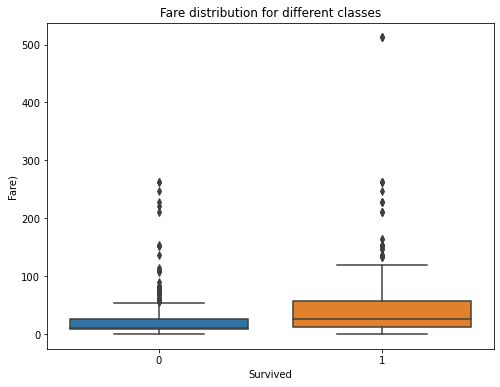

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Survived", y="Fare", data=data)
plt.title("Fare distribution for different classes")
plt.ylabel("Fare)")
plt.xlabel("Survived");

### Discussion

By using sklearn's KFold function, we are able to suffle the data (randomization) and split it into test and train. Through this process I was able to perform a 5-fold cross-validation fit of the regression model and get for each fold the intercept (model.intercept_) and a slope (model.coef_[0]).
To distinguish each of the lines, I used the iterating variable to change the color and the legend name. All 5 lines along with the regression line from 1.1 don't differ that much from each other.

### 1.2 Correlates of survival

Use whatever methods you can think of to try and figure out what factors seem to determine whether or not a person would survive the sinking of the Titanic. You can start with simple correlations, but will likely also want to use multiple regression and/or other methods in your toolkit. What do you conclude?

In [18]:
# Your code here
#Looking at the correlation of different featues with the survived feature
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [19]:
#Performing t test to idenitfy the significant variables


# list of features 
ttest_vars = ['Pclass','Age','SibSp','Parch','Fare']

data_not_survived = data[data['Survived']==0].copy()
data_survived = data[data['Survived']==1].copy()

stat_vec = np.zeros(len(ttest_vars))
pval_vec = np.zeros(len(ttest_vars))
conclusion_vec = []

# iterate through the features
for i in range(len(ttest_vars)):
    
    # do the t-test, dropping empty rows
    stat, pval = stats.ttest_ind(data_not_survived[ttest_vars[i]].dropna(),
                                 data_survived[ttest_vars[i]].dropna(),
                                 equal_var=False)
    
    # store
    stat_vec[i] = stat
    pval_vec[i] = pval
    if pval < 0.05:
        conclusion_vec.append(True)
    else:
        conclusion_vec.append(False)

final_table = pd.DataFrame({'Feature':ttest_vars,'stat':stat_vec,'pval':pval_vec,'Significant?':conclusion_vec})
final_table

,Feature,stat,pval,Significant?
0,Pclass,10.336953,2.911155e-23,True
1,Age,2.046030,4.118965e-02,True
2,SibSp,1.194353,2.326626e-01,False
3,Parch,-2.478908,1.339484e-02,True
4,Fare,-6.839099,2.699332e-11,True


### Discussion

As seen above, some of the features seem to have significant difference in their survived/not survived data points and thus could be use as good factors for predicting the survival of the passenger.

### 1.3 Preprocessing steps
Take whatever pre-processing steps you believe are necessary for each variable in the dataset (for example, these might include normalization, standardization, log transforms, dummy-encoding, or dropping a variable altogether). For now, you can ignore null values in the dataset --- we'll come back to those later. Create a table describing the preprocessing step for each variable. Make sure the variables are alphabetized and your table is well-organized.

In [98]:
# Your code here
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

#### Remove unnecessary columns

We can remove 'Ticket' and 'PassengerId', as they don't contribute to target class.
Remove 'Cabin' as it has a lot of missing values in both train and test data

In [101]:
train_data = data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])

In [102]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,2,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [103]:
# Map 'Sex' and 'Embarked' to numerical values.
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [104]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Braund, Mr. Owen Harris",NaN,22.0,1,0,7.2500,NaN
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,71.2833,NaN
2,1,2,"Heikkinen, Miss. Laina",NaN,26.0,0,0,7.9250,NaN
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,53.1000,NaN
4,0,2,"Allen, Mr. William Henry",NaN,35.0,0,0,8.0500,NaN


#### Preprocess 'Name'

Extarct title from name of the passenger and categorize them.
Drop the column 'Name'

In [105]:
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_data = train_data.drop(columns='Name')

In [107]:
#train_data.Title.value_counts().plot('bar')

In [108]:
train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')

In [110]:
# plt = train_data.Title.value_counts().sort_index().plot('bar')
# plt.set_xlabel('Title')
# plt.set_ylabel('Passenger count')

In [112]:
train_data['Title'] = train_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [113]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,NaN,22.0,1,0,7.2500,NaN,NaN
1,1,0,NaN,38.0,1,0,71.2833,NaN,NaN
2,1,2,NaN,26.0,0,0,7.9250,NaN,NaN
3,1,0,NaN,35.0,1,0,53.1000,NaN,NaN
4,0,2,NaN,35.0,0,0,8.0500,NaN,NaN


## Part 2: Decision Trees
### 2.1 Decision Tree
Using the basic [Decision Tree Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)  in sklearn, fit a model to predict titanic survival, using 10-fold cross-validation. For this and the following problems, you should set aside some (20%) of your training data as held-out test data, prior to cross-validation. 

Begin by using the default hyperparameters, and report the average training and cross-validated accuracy across the 10 folds.  Then, fit a single decision tree model on all of the training data (i.e., no cross-validation in this particular step), and report the performance of this fitted model on the held-out test data -- how does it compare to the cross-validated accuracy? Finally, show a diagram of this tree (at least the first three levels of splits), and provide a couple sentences interpreting the tree diagram.

NOTE - You may drop columns with null values for now; we'll come back to those columns later in the problem set.

In [21]:
# Your code here


In [22]:
#Imputing Embarked before label Encoding
data.Embarked.fillna(data.Embarked.mode(), inplace=True)

In [23]:
# Label Encoding
le = preprocessing.LabelEncoder()
data.Sex = le.fit_transform(data.Sex)
data.Pclass = le.fit_transform(data.Pclass)
data.SibSp = le.fit_transform(data.SibSp)
data.Parch = le.fit_transform(data.Parch)
data.Embarked= le.fit_transform(data.Embarked.astype(str))

#Features Selection
features_req = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']
data_req = data[features_req]
data_req = data_req.dropna(axis=0)

In [24]:
#Train -Test split
train, test= train_test_split(data_req,train_size = 0.8,random_state=123)
print(train.shape)
print(test.shape)

(571, 8)
(143, 8)


In [25]:
#Feature Selection
features= ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
train_X = train[features]
train_Y = train['Survived']
test_X = test[features]
test_Y = test['Survived']

In [26]:
model_1 = DecisionTreeClassifier(random_state=11)
cross_validation_result = cross_validate(model_1, train_X, train_Y, cv=10,return_train_score=True,return_estimator=True)
fold_number = list(range(1,11,1))
fold_accuracy = pd.DataFrame({"Fold": fold_number, "TrainAccuracy": cross_validation_result['train_score'],"TestAccuracy":cross_validation_result['test_score']})

In [27]:
# Average Cross-Validated Accuracy
fold_accuracy.TestAccuracy.mean()

0.7566243194192376

In [28]:
#Best model's Performance on Hold-out Test data  
best_fold = fold_accuracy.TestAccuracy.idxmax()
best_model = cross_validation_result['estimator'][best_fold]
accuracy_score(test_Y, best_model.predict(test_X))

0.7762237762237763

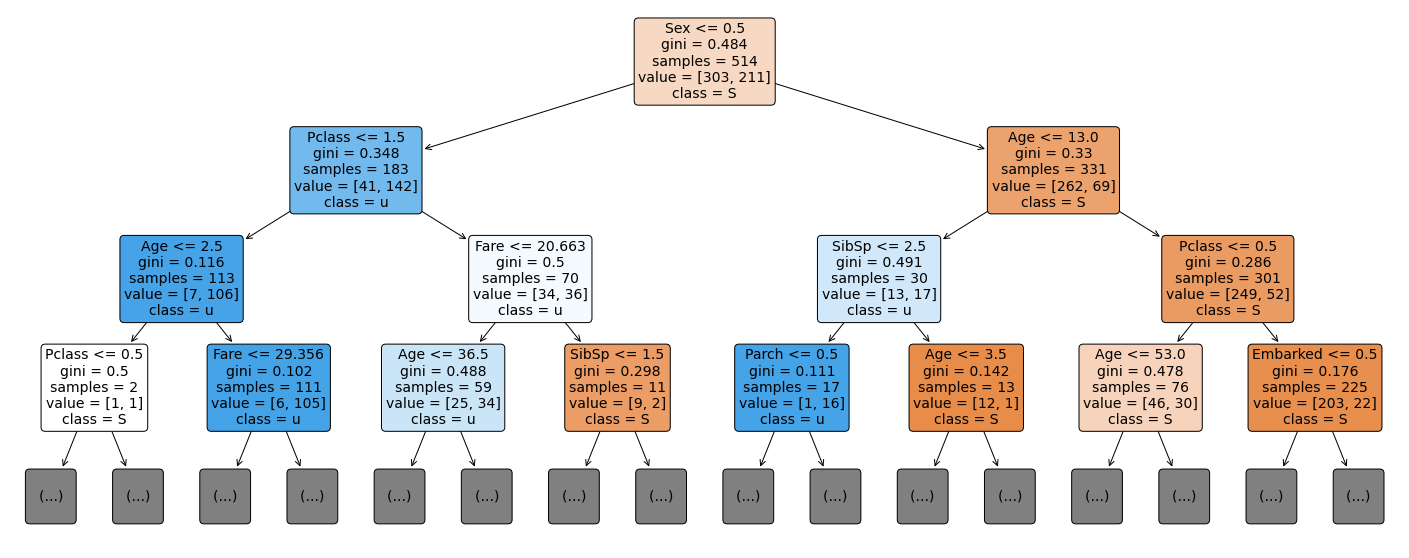

In [29]:
#upto 3 level epresentation of the Best fit model
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
a = plot_tree(best_model, 
              feature_names=features, 
              class_names="Survived", 
              max_depth=3,
              filled=True, 
              rounded=True, 
              fontsize=14)

### Discussion

Cross-validated accuracy and the performance of best fold model on the test data are quite comparable:
- Cross Validated Accuracy: 75.29%
- Accuracy on Test Set: 77.62%

### 2.2 Hyperparameter: Maximum Depth

Use all of the data (minus the held-out data) to re-fit a single decision tree with `max_depth = 4` (i.e., no cross-validation). Show the tree diagram and also plot the feature importance. What do you observe? How does the performance of this tree compare to the tree from 2.1?

In [30]:
# Your code here
#fitting the model
model_2 = DecisionTreeClassifier(max_depth=4)
model_2.fit(train_X, train_Y)

train_predicted = model_2.predict(train_X)
test_predicted = model_2.predict(test_X)

#Train Accuracy
print("Train Accuracy:")
print(accuracy_score(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Accuracy:")
print(accuracy_score(test_Y, test_predicted))

Train Accuracy:
0.8458844133099825

Test Accuracy:
0.8251748251748252


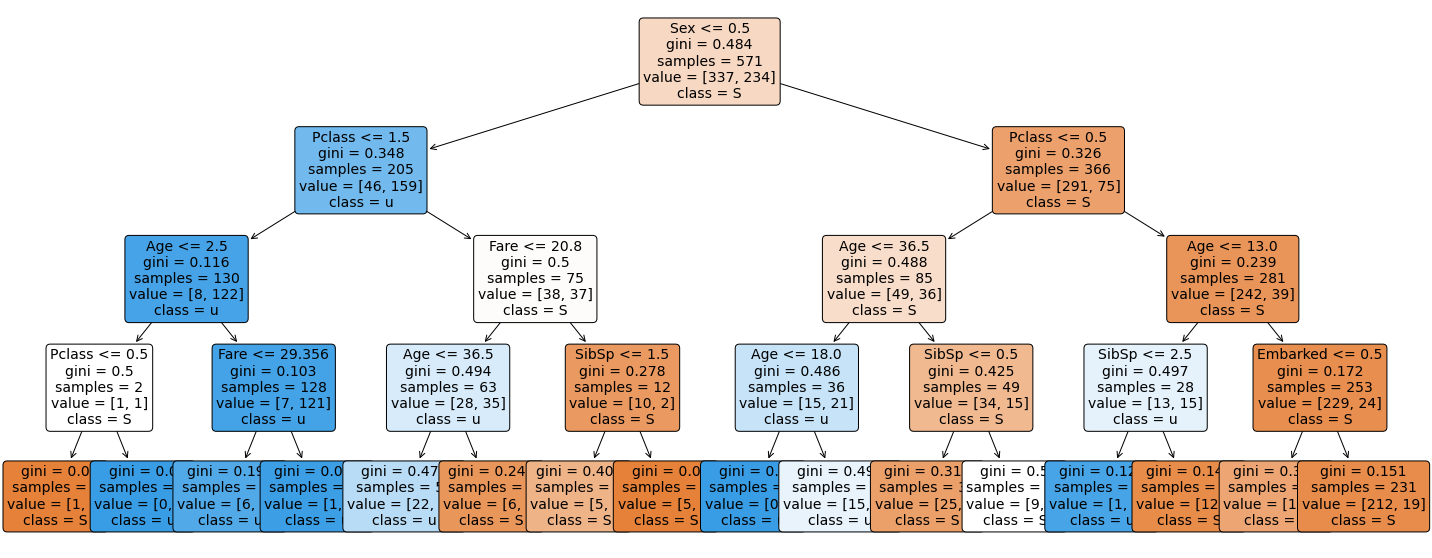

In [31]:
#Tree Diagram
plt.figure(figsize=(25,10))
a = plot_tree(model_2, 
              feature_names=features, 
              class_names="Survived", 
              filled=True, 
              rounded=True, 
              fontsize=14)

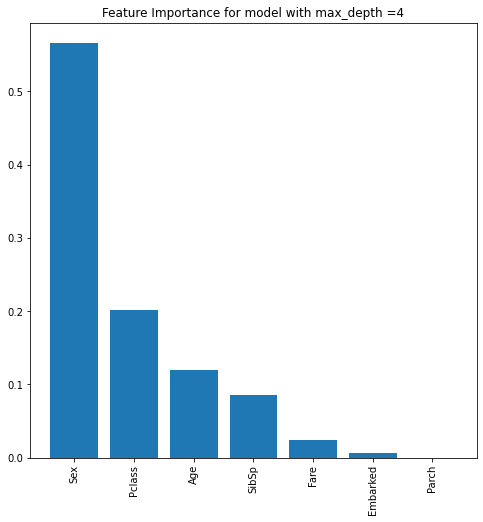

In [32]:
#Feature Importances

plt.figure(figsize=(8,8))

importances = model_2.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [train_X.columns[i] for i in indices]

# Create plot title
plt.title("Feature Importance for model with max_depth =4")

# Add bars
plt.bar(range(train_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90);

### Discussion

- Train and Test Accuracy is comparable and better than 2.1 (around 82-84%)
- Sex is the most important feature (it appears in the top most split in the Tree representation as well)

### 2.3  Tuning Hyperparameters
The built-in algorithm you are using has several parameters which you can tune. Using cross-validation, show how the choice of these parameters affects performance.

First, show how `max_depth` affects train and cross-validated accuracy. On a single axis, plot train and cross-validated accuracy as a function of `max_depth`. Use a red line to show cross-validated accuracy and a blue line to show train accuracy. Do not use your held-out test data yet.

Second, show how cross-validated accuracy relates to both `max_depth` and `min_samples_leaf`. Specifically, create a 3-D plot where the x-axis is `max_depth`, the y-axis is `min_samples_leaf`, and the z-axis shows cross-validated accuracy. What combination of `max_depth` and `min-samples_leaf` achieves the highest accuracy? How sensitive are the results to these two parameters?

Finally, select the the best hyperparameters that you got through cross-validation, and fit a single decision tree on all of the training data using those hyperparameters. Display this tree and report the accuracy of this tree on the held-out data.

In [33]:
# Your code here
#Effect of Max_depth 
max_depths = [3,4,5,6,7,8,9]
max_depth_cv_train_accuracy = []
max_depth_cv_test_accuracy = []

for maxDepth in max_depths:         
    # Initialize and fit the model
    model = DecisionTreeClassifier(max_depth=maxDepth)
    result = cross_validate(model, train_X, train_Y,cv=5,return_train_score=True)
    max_depth_cv_train_accuracy.append(result['train_score'].mean())
    max_depth_cv_test_accuracy.append(result['test_score'].mean())

result=pd.DataFrame({"max_depth":max_depths,"Train_accuracy":max_depth_cv_train_accuracy, "Test_accuracy":max_depth_cv_test_accuracy})
result

,max_depth,Train_accuracy,Test_accuracy
0,3,0.827496,0.786285
1,4,0.843697,0.802059
2,5,0.859020,0.805599
3,6,0.878719,0.782853
4,7,0.899300,0.775820
5,8,0.917690,0.777590
6,9,0.936956,0.788040


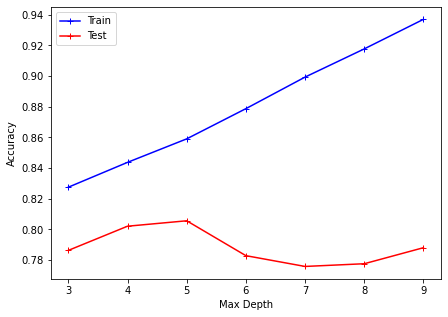

In [34]:
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(result.max_depth, result.Train_accuracy, '+-', c='blue', label='Train')
ax.plot(result.max_depth, result.Test_accuracy, '+-', c='red', label='Test')

ax.legend()
ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy');

In [35]:
#Effect of max_depth and min_samples_leaf
max_depths = [3,4,5,6,7,8,9]
min_samples_leafs = [10,20,30,40,50]
max_depth_cv_train_accuracy = []
max_depth_cv_test_accuracy = []
maxDepthlist=[]
minSampleList=[]

for maxDepth in max_depths:         
    for minSample in min_samples_leafs:         
        # Initialize and fit the model
        model = DecisionTreeClassifier(max_depth=maxDepth,min_samples_leaf=minSample)
        result = cross_validate(model, train_X, train_Y,cv=5,return_train_score=True)
        max_depth_cv_train_accuracy.append(result['train_score'].mean())
        max_depth_cv_test_accuracy.append(result['test_score'].mean())
        maxDepthlist.append(maxDepth)
        minSampleList.append(minSample)

result=pd.DataFrame({"max_depth":maxDepthlist,"min_sample_leaf":minSampleList,"Train_accuracy":max_depth_cv_train_accuracy, "Test_accuracy":max_depth_cv_test_accuracy})

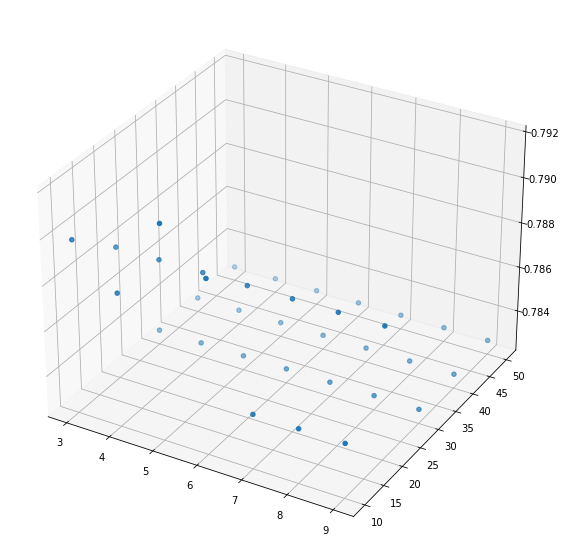

In [36]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(result.max_depth, result.min_sample_leaf, result.Test_accuracy,cmap='Greens');

In [37]:
#Best Parameters
result.iloc[result.Test_accuracy.idxmax(),:]

max_depth           5.000000
min_sample_leaf    10.000000
Train_accuracy      0.840192
Test_accuracy       0.791625
Name: 10, dtype: float64

### Discussion

- Seeing the graphs above, as max_depth increases, traning accuracy keeps on increasing. On the other hand, test accuracy first increases and then starts decreasing
- Comparing max_depth and min_samples_leaf together,the result changes rapidly. For a max_depth value, with increase in min_sample_leaf value, decreases the accuracy
- The best combination is found at max_depth of 5 with min_sample_leaf of 10

### 2.4 Support Vector Machines, for comparison

As a starting point, use the basic [sklearn SVM model](https://scikit-learn.org/stable/modules/svm.html), with the default constant penalization (C=1), to predict survival using the same set of features as above. Report your accuracy on the test and train sets.

Next, use cross-validation to determine a possibly better choice for C. Note that regularization is inversely proportional to the value of C in sklearn, i.e. the higher value you choose for C the less you regularize. Plot a graph with C on the x-axis and cross-validated accuracy on the y-axis.
    
    
How does the test performance with SVM for your best choice of C compare to the decision tree from 2.3?

In [38]:
# Your code here
#Linear SVM model with C=1 
from sklearn.svm import SVC

SVMClassifier = SVC(C=1, kernel='linear', random_state=11)
SVMClassifier.fit(train_X, train_Y)

train_predicted = SVMClassifier.predict(train_X)
test_predicted = SVMClassifier.predict(test_X)

#Train Accuracy
print("Train Accuracy:")
print(accuracy_score(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Accuracy:")
print(accuracy_score(test_Y, test_predicted))

Train Accuracy:
0.7880910683012259

Test Accuracy:
0.7482517482517482


In [39]:
#Cross-validation to identify best C

#Effect of Max_depth 
C_list = [0.01,0.1,1,10,100]
c_cv_train_accuracy = []
c_cv_test_accuracy = []

for c in C_list:         
    # Initialize and fit the model
    model = SVC(C=c, kernel='linear')
    result = cross_validate(model, train_X, train_Y,cv=3,return_train_score=True)
    c_cv_train_accuracy.append(result['train_score'].mean())
    c_cv_test_accuracy.append(result['test_score'].mean())

result=pd.DataFrame({"C":C_list,"Train_accuracy":c_cv_train_accuracy, "Test_accuracy":c_cv_test_accuracy})
result

,C,Train_accuracy,Test_accuracy
0,0.01,0.732042,0.726766
1,0.10,0.789840,0.786323
2,1.00,0.789840,0.788068
3,10.00,0.789840,0.788068
4,100.00,0.791590,0.789832


### Discussion

- There is not much difference observed with different values of C
- The best C observed is C = 100 (least regularization)
- Comparing with 2.3, with best SVM model, cross-validation accuracy is 78.98% and best Decision Tree also had similar accuracy of 79.14%

### 2.5 Missing Data, Imputation and Feature Engineering

Have you been paying close attention to your features? If not, now is a good time to start. Perform analysis that allows you to answer the following questions:
* Recall from part 1 that some features have missing data. Which features have missingness?
* Try running the decision tree and SVM models from part 1 using all columns, including those with missing data. What happens?
* Use one of the methods we discussed in class to impute missing values for each feature. For each feature with missingness, describe the method used and why it is appropriate to the feature.
* Find a way to engineer meaningful features from the "Name" and/or "Cabin" fields in the data.
* Rerun your decision tree and SVM on the new dataset with imputed missing values and the new features, including re-selecting hyperparameters via cross validation. What do you notice?

In [40]:
# Your code here
# Missing values in different features  (already imputed 2 missing values from Embarked)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [41]:
# Percentage of Missing values in different features 
data.isnull().sum()/len(data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
dtype: float64

In [42]:
#Imputing Missing values for age with its mean
data.Age.fillna(data.Age.mean(), inplace=True)

In [43]:
#Features Selection
features_req = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']
data_imputed = data[features_req]

#Train -Test split
train, test= train_test_split(data_imputed,train_size = 0.8,random_state=123)
print(train.shape)
print(test.shape)

#Feature Selection
features= ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
train_X = train[features]
train_Y = train['Survived']
test_X = test[features]
test_Y = test['Survived']

(712, 8)
(179, 8)


In [44]:
#Training Decision Tree on imputed data

model = DecisionTreeClassifier(random_state=11)
cross_validation_result = cross_validate(model, train_X, train_Y, cv=10,return_train_score=True,return_estimator=True)
fold_number = list(range(1,11,1))
fold_accuracy = pd.DataFrame({"Fold": fold_number, "TrainAccuracy": cross_validation_result['train_score'],"TestAccuracy":cross_validation_result['test_score']})

In [45]:
fold_accuracy

,Fold,TrainAccuracy,TestAccuracy
0,1,0.985938,0.791667
1,2,0.982812,0.805556
2,3,0.982839,0.774648
3,4,0.981279,0.774648
4,5,0.984399,0.760563
5,6,0.981279,0.760563
6,7,0.987520,0.760563
7,8,0.982839,0.816901
8,9,0.979719,0.774648
9,10,0.981279,0.788732


In [46]:
fold_accuracy.TestAccuracy.mean()

0.7808489827856026

In [47]:
#Effect of Max_depth 
max_depths = [3,4,5,6,7,8,9]
max_depth_cv_train_accuracy = []
max_depth_cv_test_accuracy = []

for maxDepth in max_depths:         
    # Initialize and fit the model
    model = DecisionTreeClassifier(max_depth=maxDepth)
    result = cross_validate(model, train_X, train_Y,cv=5,return_train_score=True)
    max_depth_cv_train_accuracy.append(result['train_score'].mean())
    max_depth_cv_test_accuracy.append(result['test_score'].mean())

result=pd.DataFrame({"max_depth":max_depths,"Train_accuracy":max_depth_cv_train_accuracy, "Test_accuracy":max_depth_cv_test_accuracy})
result

,max_depth,Train_accuracy,Test_accuracy
0,3,0.825493,0.803359
1,4,0.838482,0.810381
2,5,0.850419,0.793549
3,6,0.870436,0.800542
4,7,0.889044,0.796346
5,8,0.908360,0.789343
6,9,0.925916,0.782252


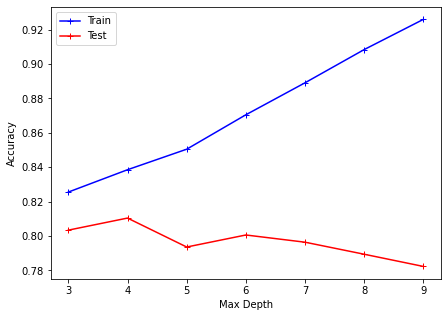

In [48]:
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(result.max_depth, result.Train_accuracy, '+-', c='blue', label='Train')
ax.plot(result.max_depth, result.Test_accuracy, '+-', c='red', label='Test')

ax.legend()
ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy');

In [49]:
#Fitting SVM with imputed Data

#Linear SVM model with C=1 
SVMClassifier = SVC(C=1, kernel='linear', random_state=11)
SVMClassifier.fit(train_X, train_Y)

train_predicted = SVMClassifier.predict(train_X)
test_predicted = SVMClassifier.predict(test_X)

#Train Accuracy
print("Train Accuracy:")
print(accuracy_score(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Accuracy:")
print(accuracy_score(test_Y, test_predicted))

Train Accuracy:
0.7837078651685393

Test Accuracy:
0.7988826815642458


### Discussion

- Age and Cabin have missing data values. Age has 19% missing values whereas cabin has 77% missing values
- With missing values, we get error while runnng Decision trees - so we removed those before training tha classfier in previous parts
- Imputed age with mean value of the column
- Performance (Accuracy):
    - SVM (Imputed Data): 79.88%
    - SVM (Without Imputation):  74.82%
    
    - DT (Imputed Data, max_depth by CV): Around 80%
    - DT (Without Imputed Data, max_depth by CV): Around 80%
    
- There is an impact on SVM accuracy with and without imputation but DT performance is almost similar in both the case.

### 2.6 ROC Curve

For your best decision tree from 2.5, plot the reciever operating characteristic (ROC) curve on the test set data. Report the area under the curve (AUC) score. *Hint*: scikit-learn's built-in predict_proba function may be helpful for this problem.  For each model, identify the point on the ROC curve that is closest to the top-left corner, and identify the associated probability threshold for classification. Place a vertical line on your plot indicating the FPR value at the threshold. Finally, report accuracy on the test set using the threshold you identified. Comparing to the accuracy from 2.5, what do you observe? 

ROC AUC: 0.89


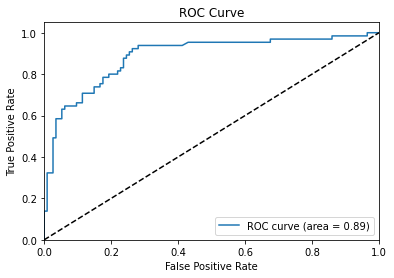

In [50]:
# Your code here
from sklearn.metrics import roc_curve, auc

SVMClassifier = SVC(C=1, kernel='linear', random_state=11, probability=True)
SVMClassifier.fit(train_X, train_Y)

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(test_Y, SVMClassifier.predict_proba(test_X)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

*Your observations here*

## Part 3: Many Trees

### 3.1: Random Forest
Use the [random forest classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict survival on the titanic. Use cross-validation on the training data to choose the best hyper-parameters --- including the maximum depth, number of trees in the forest, and the minimum samples per leaf.
* What hyperparameters did you select with cross-validation? You should use cross-validation to select all of the hyperparameters (i.e. search a grid of hyperparameters), and report the combination that maximizes cross-validated accuracy). You can use fewer cross validation folds than the 10 folds from previous problems, to keep your code from taking too long to run.
* How does the cross-validated performance (average across validation folds) compare to the test performance (using the top-performing, fitted model selected through cross-validation)?
* How does the RF performance compare to the decision tree and SVM from part 2.5?
* Create 3 subplots that show how cross-validated performance (y-axis) relates to the number of trees in the forest (x-axis), maximum depth (x-axis), and minimum samples per leaf (x-axis). What do you observe?

In [51]:
# Your code here
from sklearn.ensemble import RandomForestClassifier

#Effect of max_depth and min_samples_leaf
max_depths = [3,4,5,6,7,8,9]
n_trees = [100,200,300,400,500]

cv_train_accuracy = []
cv_test_accuracy = []
maxDepthlist=[]
n_treesList=[]

for n_tree in n_trees:         
    for maxDepth in max_depths:         
        # Initialize and fit the model
        model = RandomForestClassifier(n_estimators=n_tree,max_depth= maxDepth,random_state =11)
        result = cross_validate(model, train_X, train_Y,cv=5,return_train_score=True)
        cv_train_accuracy.append(result['train_score'].mean())
        cv_test_accuracy.append(result['test_score'].mean())
        maxDepthlist.append(maxDepth)
        n_treesList.append(n_tree)

result=pd.DataFrame({"N_Trees":n_treesList,"max_depth":maxDepthlist,"Train_accuracy":cv_train_accuracy, "Test_accuracy":cv_test_accuracy})

In [52]:
#Best Parameters
result.iloc[result.Test_accuracy.idxmax(),:]

N_Trees           200.000000
max_depth           4.000000
Train_accuracy      0.843401
Test_accuracy       0.824426
Name: 8, dtype: float64

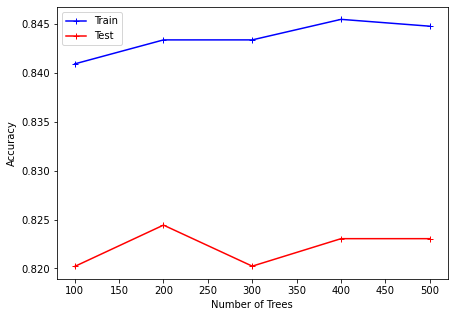

In [53]:
#Effect of only n_trees
n_trees = [100,200,300,400,500]

cv_train_accuracy = []
cv_test_accuracy = []
n_treesList=[]

for n_tree in n_trees:         
    # Initialize and fit the model
    model = RandomForestClassifier(n_estimators=n_tree,max_depth= 4,random_state = 11)
    result = cross_validate(model, train_X, train_Y,cv=5,return_train_score=True)
    cv_train_accuracy.append(result['train_score'].mean())
    cv_test_accuracy.append(result['test_score'].mean())
    n_treesList.append(n_tree)

result=pd.DataFrame({"N_Trees":n_treesList,"Train_accuracy":cv_train_accuracy, "Test_accuracy":cv_test_accuracy})

fig, ax = plt.subplots(figsize=(7,5))

ax.plot(result.N_Trees, result.Train_accuracy, '+-', c='blue', label='Train')
ax.plot(result.N_Trees, result.Test_accuracy, '+-', c='red', label='Test')

ax.legend()
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Accuracy');

In [54]:
result.Test_accuracy.mean()

0.822182606126268

In [55]:
#Model with best Hyper parameters

model = RandomForestClassifier(n_estimators=100,max_depth= 4,random_state=11)
model.fit(train_X, train_Y)

train_predicted = model.predict(train_X)
test_predicted = model.predict(test_X)

#Train Accuracy
print("Train Accuracy:")
print(accuracy_score(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Accuracy:")
print(accuracy_score(test_Y, test_predicted))

Train Accuracy:
0.8426966292134831

Test Accuracy:
0.8659217877094972


### Discussion

- Hyperparameters selected with cross-validation: 
    - N_trees = 100
    - Max_depth = 4
    
- Performance comparison
    - Cross-validated performance (average across validation folds): 81.99%
    - Test performance (using the top-performing, fitted model selected through cross-validation): 86.03%

- Performance comparison (cross validated accuracy:
    - RF: Around 82% 
    - Decision tree : Around 80%
    - SVM: Around 80%

### 3.2: Gradient Boosting

Use the [Gradient Boosting classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to predict survival on the Titanic. Tune your hyperparameters with cross validation. Again, you should tune more parameteres than just `max_depth`.
* How does the GBM performance compare to the other models?
* Create a figure showing the feature importances in your final model (with properly tuned hyperparameters)


In [56]:
# Your code here
from sklearn.ensemble import GradientBoostingClassifier

#Effect of max_depth and min_samples_leaf
learning_rates = [0.01,0.1,0.2,0.3,0.4,0.5]
n_trees = [100,200,300,400,500]

cv_train_accuracy = []
cv_test_accuracy = []
learning_rateList=[]
n_treesList=[]

for n_tree in n_trees:         
    for learning_rate in learning_rates:         
        # Initialize and fit the model
        model = GradientBoostingClassifier(n_estimators=n_tree,learning_rate=learning_rate,random_state=11)
        result = cross_validate(model, train_X, train_Y,cv=5,return_train_score=True)
        cv_train_accuracy.append(result['train_score'].mean())
        cv_test_accuracy.append(result['test_score'].mean())
        learning_rateList.append(learning_rate)
        n_treesList.append(n_tree)

result=pd.DataFrame({"N_Trees":n_treesList,"LearningRate":learning_rateList,"Train_accuracy":cv_train_accuracy, "Test_accuracy":cv_test_accuracy})

In [57]:
#Best Parameters
result.iloc[result.Test_accuracy.idxmax(),:]

N_Trees           400.000000
LearningRate        0.010000
Train_accuracy      0.866220
Test_accuracy       0.832857
Name: 18, dtype: float64

In [58]:
result.head()

,N_Trees,LearningRate,Train_accuracy,Test_accuracy
0,100,0.01,0.834620,0.807554
1,100,0.10,0.908707,0.821639
2,100,0.20,0.943823,0.811799
3,100,0.30,0.958215,0.807545
4,100,0.40,0.968047,0.797715


In [59]:
#Model with best Hyper parameters

model = GradientBoostingClassifier(n_estimators=400,learning_rate= 0.01,random_state=11)
model.fit(train_X, train_Y)

train_predicted = model.predict(train_X)
test_predicted = model.predict(test_X)

#Train Accuracy
print("Train Accuracy:")
print(accuracy_score(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Accuracy:")
print(accuracy_score(test_Y, test_predicted))

Train Accuracy:
0.8567415730337079

Test Accuracy:
0.8379888268156425


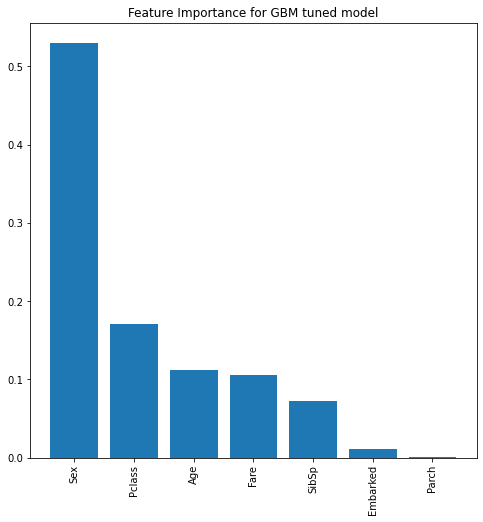

In [60]:
#Feature Importances

plt.figure(figsize=(8,8))

importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [train_X.columns[i] for i in indices]

# Create plot title
plt.title("Feature Importance for GBM tuned model")

# Add bars
plt.bar(range(train_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90);



### Discussion

- Performance comparison (on test set):
    - Gradient Boosting: 83.79%
    - RF: Around 86.5% 
    - Decision tree : Around 80%
    - SVM: Around 80%

## Part 4: Neural Networks

Carry on the classification by using feed forward neural networks, using functionality imported from [keras](https://keras.io/api/). You are responsible for choosing the number of layers, their corresponding size, the activation functions and the choice of gradient descent algorithm (and its parameters e.g. learning rate). Pick those parameters by hand. For some of them you can also perform cross-validation if you wish, but cross validation is not required. Your goal is to tune those parameters so that your test accuracy is at least above 75%. 

Report your accuracy on the test set along with your choice of parameters. More specifically, report the number of layers, their size, the activation functions and your choice of optimization algorithm. 

It is a good exercise to experiment with different optimizers (gradient descent, stochastic gradient descent, AdaGrad etc), learning rates, batch sizes etc. to get a feeling of how they affect neural network training. Experiment with some of these options. What do you observe?

In [95]:
from keras.models import Sequential 
from keras.layers import Dense

In [96]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 9)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 50        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 218
Trainable params: 218
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Compiling the NN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the NN
model.fit(train_X, train_Y, batch_size = 32, epochs = 200)


Epoch 1/200
712/712 [==============================] - 2s 2ms/step - loss: 0.6920 - accuracy: 0.6110
Epoch 2/200
712/712 [==============================] - 0s 186us/step - loss: 0.6894 - accuracy: 0.6110
Epoch 3/200
712/712 [==============================] - 0s 205us/step - loss: 0.6852 - accuracy: 0.6138
Epoch 4/200
712/712 [==============================] - 0s 184us/step - loss: 0.6773 - accuracy: 0.6250
Epoch 5/200
712/712 [==============================] - 0s 161us/step - loss: 0.6621 - accuracy: 0.6376
Epoch 6/200
712/712 [==============================] - 0s 198us/step - loss: 0.6416 - accuracy: 0.6489
Epoch 7/200
712/712 [==============================] - 0s 156us/step - loss: 0.6233 - accuracy: 0.6643
Epoch 8/200
712/712 [==============================] - 0s 200us/step - loss: 0.6159 - accuracy: 0.6798
Epoch 9/200
712/712 [==============================] - 0s 299us/step - loss: 0.6067 - accuracy: 0.6770
Epoch 10/200
712/712 [==============================] - 0s 254us/step - los

712/712 [==============================] - 0s 300us/step - loss: 0.4397 - accuracy: 0.8090
Epoch 158/200
712/712 [==============================] - 0s 247us/step - loss: 0.4438 - accuracy: 0.7992
Epoch 159/200
712/712 [==============================] - 0s 260us/step - loss: 0.4401 - accuracy: 0.8146
Epoch 160/200
712/712 [==============================] - 0s 213us/step - loss: 0.4343 - accuracy: 0.8132
Epoch 161/200
712/712 [==============================] - 0s 181us/step - loss: 0.4368 - accuracy: 0.8132
Epoch 162/200
712/712 [==============================] - 0s 306us/step - loss: 0.4417 - accuracy: 0.7963
Epoch 163/200
712/712 [==============================] - 0s 177us/step - loss: 0.4363 - accuracy: 0.8118
Epoch 164/200
712/712 [==============================] - 0s 183us/step - loss: 0.4339 - accuracy: 0.8104
Epoch 165/200
712/712 [==============================] - 0s 199us/step - loss: 0.4338 - accuracy: 0.8062
Epoch 166/200
712/712 [==============================] - 0s 166us/ste

### Discussion

As we can see from the results of the NN prediction on the test data, the accuracy is 81% with a loss of 0.4304

## Part 5: Putting it all together!

Create a final table that summarizes the performance of your models as follows. What do you observe? Are there trends in which models and hyperparameters work best?

| Model | Cross-validated Performance   | Train Performance | Test Performance | Chosen Hyperparameters | 
|------|------|------| | |
|   Decision Tree        |  |  |  |  |
|   Decision Tree (with imputed missing values and new features) |  |  |  |  |
|   SVM  |  |  |  |  |
|   SVM (with imputed missing values and new features)        |  |  |  |  |
|   Random Forest        |  |  |  |  |
|   Random Forest (with imputed missing values and new features)        |  |   |  | |
|   Gradient Boosting    |  |  |  |  |
|   Gradient Boosting (with imputed missing values and new features)        |  |  |  |  |
|   Neural Network    |  |  |  |  |
|   Neural Network (with imputed missing values and new features)        |  |   |  |  |

In [ ]:
#Creating New features
data['Number_of_Characters_Name'] = data.Name.apply(len)

#Label Encoding Cabin data (Null values will be used as a separate encoded level)
data.Cabin= le.fit_transform(data.Cabin.astype(str))

#More on how to engineer new features mentioned below

In [ ]:
#Features Selection
features_req = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived','Cabin','Number_of_Characters_Name']
data_imputed_new_features = data[features_req]

#Train -Test split
train, test= train_test_split(data_imputed_new_features,train_size = 0.8,random_state=123)
print(train.shape)
print(test.shape)

#Feature Selection
features= ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Cabin','Number_of_Characters_Name']
train_X = train[features]
train_Y = train['Survived']
test_X = test[features]
test_Y = test['Survived']

In [ ]:
#Decision Tree
print("Decision Tree")
print()

model = DecisionTreeClassifier(max_depth=4, random_state=11)
cross_validation_result = cross_validate(model, train_X, train_Y, cv=10,return_estimator=True)
fold_number = list(range(1,11,1))
fold_accuracy = pd.DataFrame({"Fold": fold_number,"TestAccuracy":cross_validation_result['test_score']})

print("Cross-Validated Accuracy:")
print(fold_accuracy.TestAccuracy.mean())

print()
#Best model's Performance on Hold-out Test data  
best_fold = fold_accuracy.TestAccuracy.idxmax()
best_model = cross_validation_result['estimator'][best_fold]

print("Test Set Accuracy:")
print(accuracy_score(test_Y, best_model.predict(test_X)))

In [ ]:
#SVM
print("SVM")
print()

#Linear SVM model with C=1 
model = SVC(C=1, kernel='linear', random_state=11)
cross_validation_result = cross_validate(model, train_X, train_Y, cv=10,return_estimator=True)
fold_number = list(range(1,11,1))
fold_accuracy = pd.DataFrame({"Fold": fold_number,"TestAccuracy":cross_validation_result['test_score']})

print("Cross-Validated Accuracy:")
print(fold_accuracy.TestAccuracy.mean())

print()
#Best model's Performance on Hold-out Test data  
best_fold = fold_accuracy.TestAccuracy.idxmax()
best_model = cross_validation_result['estimator'][best_fold]

print("Test Set Accuracy:")
print(accuracy_score(test_Y, best_model.predict(test_X)))

In [ ]:
#Random Forest 
print("Random Forest")
print()

model = RandomForestClassifier(n_estimators=100,max_depth= 4,random_state=11)
cross_validation_result = cross_validate(model, train_X, train_Y, cv=10,return_estimator=True)
fold_number = list(range(1,11,1))
fold_accuracy = pd.DataFrame({"Fold": fold_number,"TestAccuracy":cross_validation_result['test_score']})

print("Cross-Validated Accuracy:")
print(fold_accuracy.TestAccuracy.mean())

print()
#Best model's Performance on Hold-out Test data  
best_fold = fold_accuracy.TestAccuracy.idxmax()
best_model = cross_validation_result['estimator'][best_fold]

print("Test Set Accuracy:")
print(accuracy_score(test_Y, best_model.predict(test_X)))

In [ ]:
#GBM
#Random Forest 
print("Gradient Boosting Machine")
print()

model = GradientBoostingClassifier(n_estimators=400,learning_rate= 0.01,random_state=11)
cross_validation_result = cross_validate(model, train_X, train_Y, cv=10,return_estimator=True)
fold_number = list(range(1,11,1))
fold_accuracy = pd.DataFrame({"Fold": fold_number,"TestAccuracy":cross_validation_result['test_score']})

print("Cross-Validated Accuracy:")
print(fold_accuracy.TestAccuracy.mean())

print()
#Best model's Performance on Hold-out Test data  
best_fold = fold_accuracy.TestAccuracy.idxmax()
best_model = cross_validation_result['estimator'][best_fold]

print("Test Set Accuracy:")
print(accuracy_score(test_Y, best_model.predict(test_X)))

##### Final Comparison Table (based on results from this and previous parts):


| Model | Cross-validated Performance   | Test Performance | 
|------|------|------|
|   Decision Tree (From 2.1)      | 75.29 |  77.62|
|   Decision Tree (with imputed missing values and new features)        | 81.04  |82.12  |
|   SVM (From 2.4)  | 78.8 | 74.82 |
|   SVM (with imputed missing values and new features)        |  78.38| 79.88 |
|   Random Forest (with imputed missing values - from 3.2)      |  82.47|86.59  |
|   Random Forest (with imputed missing values and new features)        |81.88  | 82.68  |
|   Gradient Boosting (with imputed missing values - from 3.3)     | 83.28 |83.79  | 
|   Gradient Boosting (with imputed missing values and new features)        | 82.71 | 83.79  |



### Discussion
#### Process for generating New Features from Name :

  - Since Name is a textual field, we could apply a lot of text analytics feature to engineer new features from the Name field, such as:
      - We can represent the data in bag of words format
      - We can compute TF-IDF score of different words from the textual corpus
      - We can identify the relevant words based on tf-idf score and keep only top few of those as binary fetaures (presence or absence of those words
      - Count the number of vowels in the name
      - Count the number of characters in the name (done here)
    